<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04


## Problema 01

<img src="https://cdni.iconscout.com/illustration/free/thumb/free-sales-team-illustration-download-in-svg-png-gif-file-formats--business-pack-illustrations-1730192.png" width = "300" align="center"/>


El conjunto de datos, denominado `company_sales_data.csv`, recoge las ventas mensuales de distintos productos de una empresa, ofreciendo una visión general de las unidades vendidas y los beneficios generados. Entre los productos incluidos se encuentran cremas faciales, jabones de baño y artículos para el cuidado capilar. Este conjunto de datos es útil para analizar el rendimiento de ventas y el comportamiento del mercado a lo largo del tiempo.

### Descripción de los Datos:

1. **month_number**: Número correspondiente al mes del año (1 para enero, 2 para febrero, etc.).
2. **facecream**: Cantidad de unidades de crema facial vendidas durante el mes.
3. **facewash**: Cantidad de unidades de limpiador facial vendidas durante el mes.
4. **toothpaste**: Cantidad de unidades de pasta de dientes vendidas durante el mes.
5. **bathingsoap**: Cantidad de unidades de jabón de baño vendidas durante el mes.
6. **shampoo**: Cantidad de unidades de champú vendidas durante el mes.
7. **moisturizer**: Cantidad de unidades de crema hidratante vendidas durante el mes.
8. **total_units**: Total de unidades vendidas de todos los productos en un mes dado.
9. **total_profit**: Ganancia total obtenida por la venta de todos los productos durante el mes, expresada en la moneda correspondiente.



In [4]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [5]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El **objetivo principal** es extraer la mayor cantidad de información posible de este conjunto de datos. Para lograrlo, se deben abordar las siguientes tareas. Para cada pregunta, deberá obtener una conclusión basada en los gráficos generados. Al finalizar todas las preguntas, se espera una conclusión general del análisis.

> **Nota:** Se permite el uso de las librerías Matplotlib o Seaborn para la visualización y análisis de los datos.




1. Lea la columna **`total_profit`** correspondiente a todos los meses y represente los datos utilizando un gráfico lineal y un gráfico de dispersión.


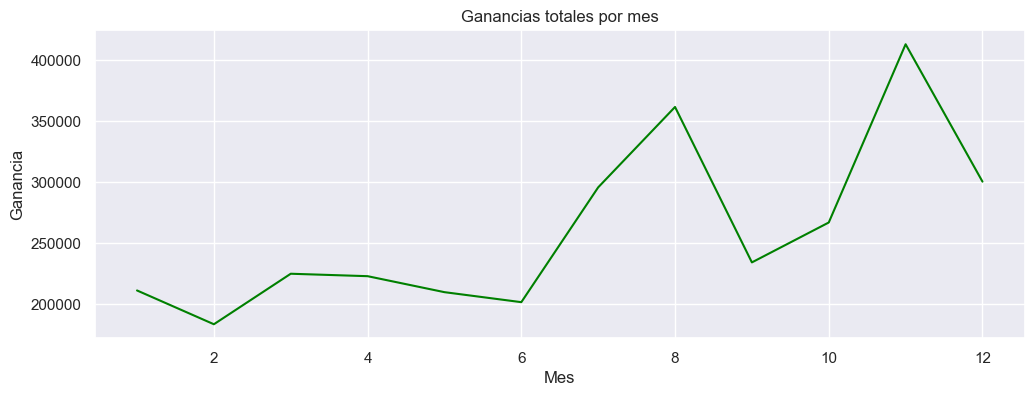

In [39]:

# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df,
    x='month_number', 
    y='total_profit', 
    color = 'green'
)
# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.title('Ganancias totales por mes')

# Mostrar el gráfico
plt.show()

Notemos que el mes con mayores ventas es el penultimo, asumiendo, que este es noviembre podemos concluir que en las fechas cercanas a navidad aumenta la cantidad de productos vendidos.

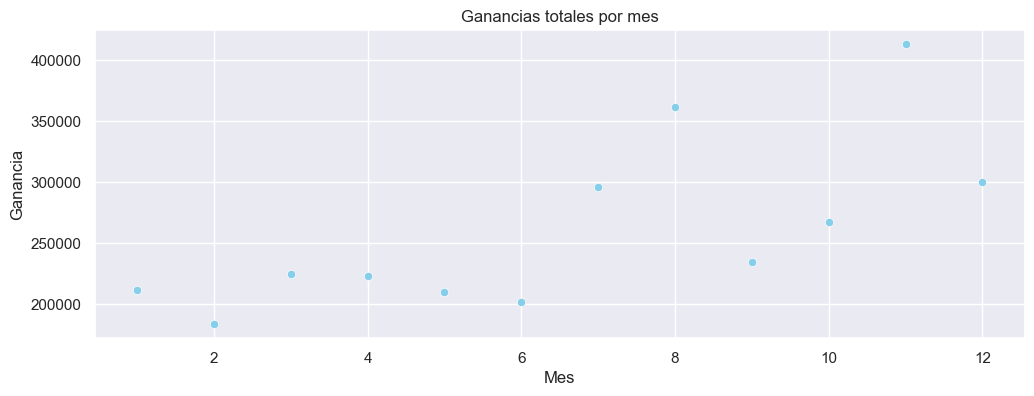

In [6]:
#Crear grafico de dispersion
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df,
    x='month_number', 
    y='total_profit', 
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.title('Ganancias totales por mes')

# Mostrar el gráfico
plt.show()

En este caso, este grafico no aporta informacion adicional respecto a un grafico de lineas.

2. Lea los datos de ventas de todos los productos y represéntelos en un gráfico de líneas múltiples.


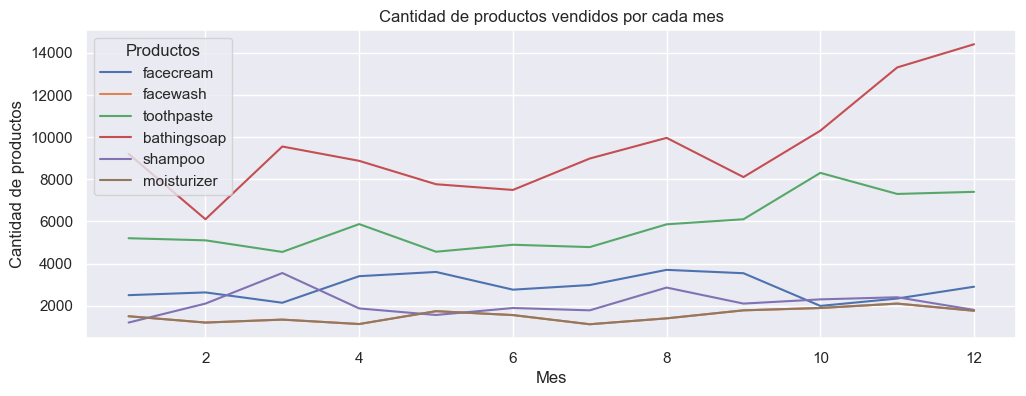

In [7]:
df_copia=df.drop(columns=['total_units','total_profit']) #copia de memoria
df_plot1 = df_copia.melt(id_vars='month_number', var_name='Productos', value_name='ventas') #melt para organizar el data
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(data=df_plot1, x='month_number', y='ventas', hue='Productos') #creacion del grafico

# Añadir etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de productos')
plt.title('Cantidad de productos vendidos por cada mes')

# Mostrar el gráfico
plt.show()

Lo primero que notamos es que los productos con mayores ventas es el jabon para la ducha y le sigue la pasta de dientes. La menor cantidad de productos comprado son los "moisturizer"

3. Lea los datos de ventas de **`facecream`** y **`facewash`** y represéntelos utilizando un gráfico de barras.

Text(0.5, 1.0, 'Grafico Unidades de Facecream y Facewash Vendidas')

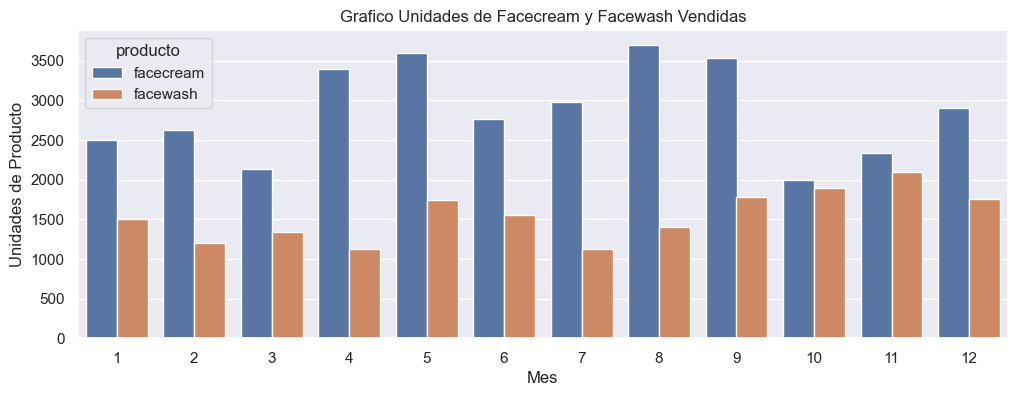

In [17]:
df_plotbar=df.loc[:,['month_number','facecream','facewash']]
df_plotbar=pd.melt(df_plotbar,id_vars='month_number',var_name='producto',value_name='ventas') #melt de las columnas
plt.figure(figsize=(12,4))
sns.barplot( #creacion del grafico de barra
    data=df_plotbar,
    x='month_number',
    y='ventas',
    hue='producto'
)
plt.xlabel('Mes')
plt.ylabel('Unidades de Producto')
plt.title('Grafico Unidades de Facecream y Facewash Vendidas')

El producto con mas ventas en cada mes es facecream

4. Lea los datos de ventas de todos los productos y represéntelos utilizando un gráfico de caja (*box-plot*).


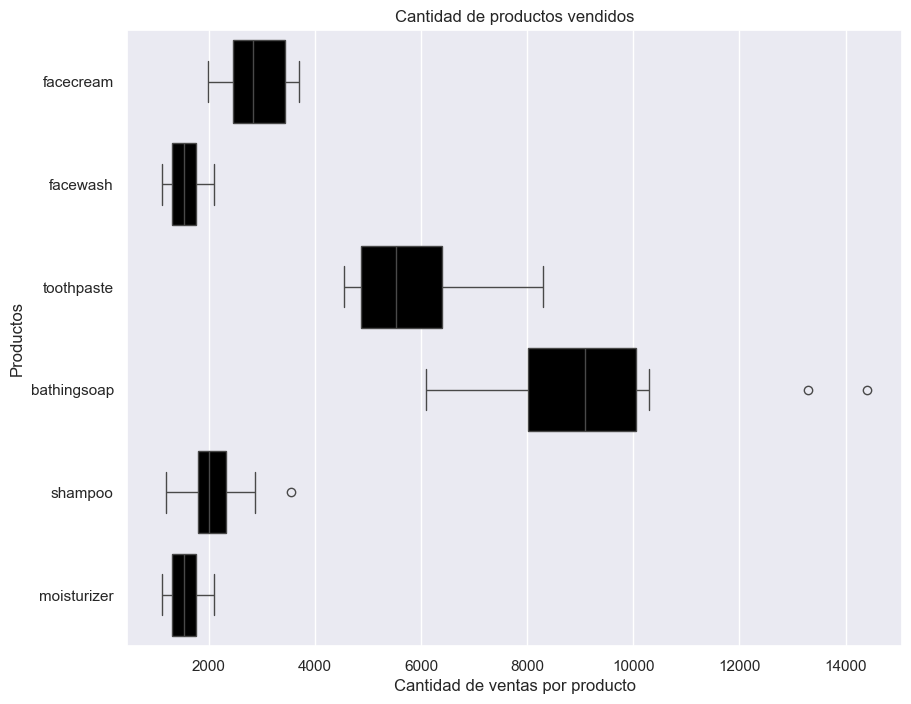

In [21]:
df_plotbox=df.drop(columns=['month_number','total_units','total_profit']) #Limpieza del data
sns.boxplot(data=df_plotbox,color="black",orient="h") #Creacion del grafico box plot
#Personalizar el gráfico
plt.xlabel('Cantidad de ventas por producto')
plt.ylabel('Productos')
plt.title('Cantidad de productos vendidos')

#Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=0)

#Mostrar el gráfico
plt.show()

La venta mas estable aunque menor en cantidad es la de moisturizer, pues, la caja esta achatada y la dispersion de datos es baja. No es el caso del bathingsoap.

5. Calcule las ventas totales del año pasado para cada producto y represéntelas utilizando un gráfico circular.

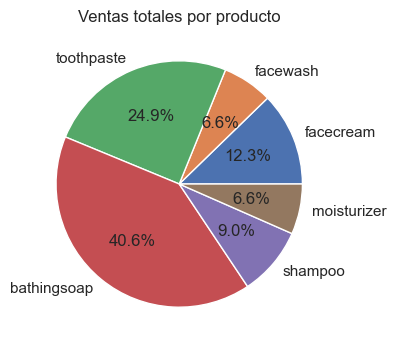

In [22]:
sales_sum = df_plotbox.sum() #suma de todas las ventas por producto
plt.figure(figsize=(12,4))
plt.pie(sales_sum,labels=sales_sum.index,autopct='%1.1f%%')
plt.title('Ventas totales por producto')
plt.show()

Aunque este entrega la misma informacion que el grafico de lineas del primer ejercicio, en este es aun mas notorio la diferencia de ventas por producto, donde el bathingsoap tiene un 40,6%.